In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import files
uploaded = files.upload()  # Upload the dataset folder
 (zip file or individual files)


Saving archive (7).zip to archive (7).zip


In [3]:
import zipfile
with zipfile.ZipFile('archive (7).zip', 'r') as zip_ref:
    zip_ref.extractall('dataset')

In [4]:
train_data_dir = 'dataset/train'
test_data_dir = 'dataset/test'
batch_size = 32  # Set your desired batch size

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize pixel values
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(48, 48),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(48, 48),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical'
)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


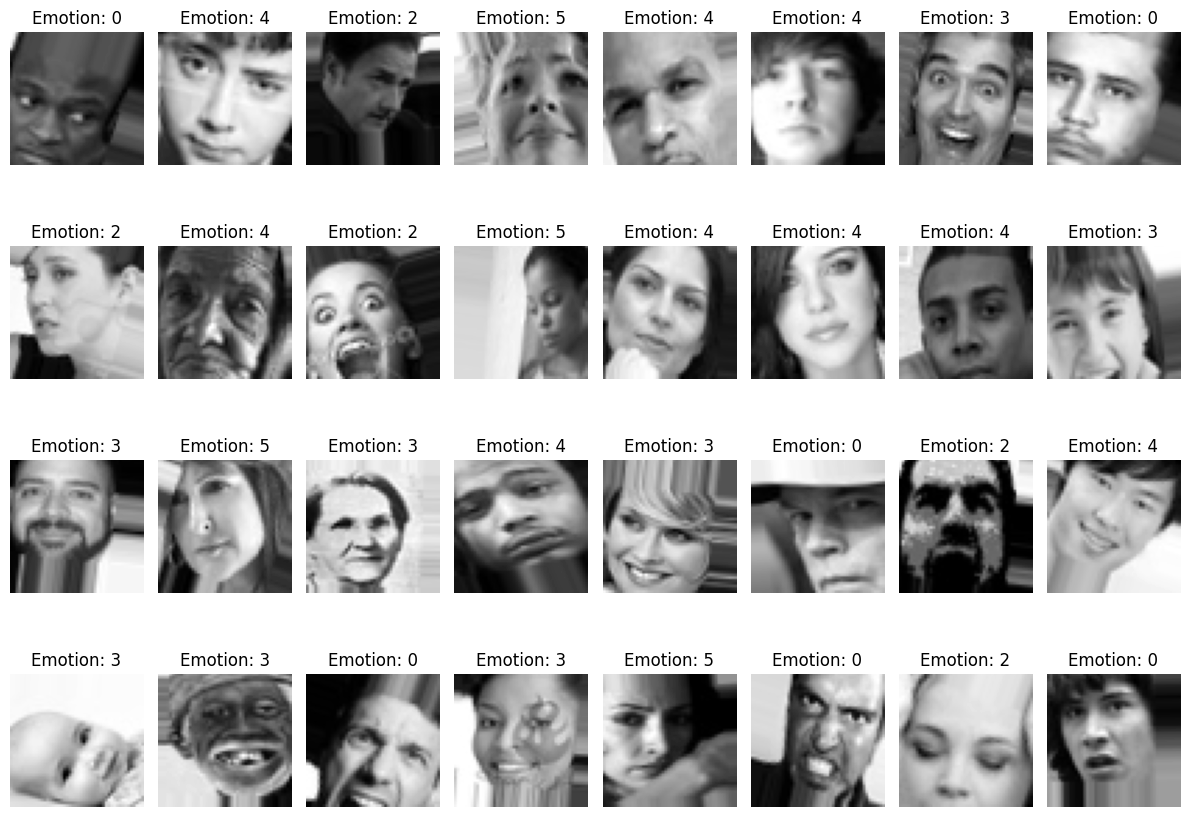

In [5]:
import matplotlib.pyplot as plt

# Display a grid of sample images
sample_images, sample_labels = next(train_generator)
num_samples = len(sample_images)

plt.figure(figsize=(12, 9))
for i in range(num_samples):
    plt.subplot(4, 8, i+1)
    plt.imshow(sample_images[i].reshape(48, 48), cmap='gray')
    plt.title(f"Emotion: {sample_labels[i].argmax()}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [6]:
  #model

def build_emotion_recognition_model(input_size, num_classes):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation="relu", input_shape=input_size))
    model.add(MaxPooling2D(2, 2))
    model.add(Conv2D(64, (3, 3), activation="relu"))
    model.add(MaxPooling2D(2, 2))
    model.add(Conv2D(128, (3, 3), activation="relu"))
    model.add(MaxPooling2D(2, 2))
    model.add(Flatten())
    model.add(Dense(256, activation="relu"))
    model.add(Dropout(0.5))  # Missing 'model.add' before Dropout
    model.add(Dense(num_classes, activation="softmax"))  # 'Softmax' should be lowercase 'softmax'
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])
    return model


In [7]:
model = build_emotion_recognition_model(input_size=(48, 48, 1), num_classes=7)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

In [8]:
# Set the input size and number of classes
input_size = (48, 48, 1)
num_classes = 7

# Build the model
model = build_emotion_recognition_model(input_size, num_classes)

# Train the model
num_epochs = 10  # Set the number of epochs
history = model.fit(
    train_generator,
    epochs=num_epochs,
    validation_data=test_generator,
    verbose=1
)


Epoch 1/10
898/898 [==============================] - 44s 36ms/step - loss: 1.8081 - accuracy: 0.2504 - val_loss: 1.7861 - val_accuracy: 0.2477
Epoch 2/10
898/898 [==============================] - 33s 37ms/step - loss: 1.7745 - accuracy: 0.2595 - val_loss: 1.7163 - val_accuracy: 0.2902
Epoch 3/10
898/898 [==============================] - 31s 35ms/step - loss: 1.7334 - accuracy: 0.2857 - val_loss: 1.6383 - val_accuracy: 0.3281
Epoch 4/10
898/898 [==============================] - 30s 34ms/step - loss: 1.6652 - accuracy: 0.3275 - val_loss: 1.5121 - val_accuracy: 0.4079
Epoch 5/10
898/898 [==============================] - 30s 34ms/step - loss: 1.5883 - accuracy: 0.3761 - val_loss: 1.4464 - val_accuracy: 0.4511
Epoch 6/10
898/898 [==============================] - 31s 35ms/step - loss: 1.5253 - accuracy: 0.4034 - val_loss: 1.3892 - val_accuracy: 0.4659
Epoch 7/10
898/898 [==============================] - 31s 34ms/step - loss: 1.4797 - accuracy: 0.4261 - val_loss: 1.3093 - val_accuracy:

In [9]:
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


225/225 [==============================] - 4s 17ms/step - loss: 1.2583 - accuracy: 0.5128
Test Loss: 1.2583061456680298
Test Accuracy: 0.5128169655799866


In [10]:
sample_images, sample_labels = next(test_generator)
predictions = model.predict(sample_images)


1/1 [==============================] - 0s 103ms/step


In [11]:
import numpy as np

predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(sample_labels, axis=1)

for i in range(len(predicted_labels)):
    print("Predicted:", predicted_labels[i], "True:", true_labels[i])


Predicted: 6 True: 6
Predicted: 4 True: 4
Predicted: 4 True: 5
Predicted: 4 True: 4
Predicted: 3 True: 6
Predicted: 6 True: 6
Predicted: 4 True: 4
Predicted: 5 True: 5
Predicted: 5 True: 2
Predicted: 4 True: 0
Predicted: 4 True: 5
Predicted: 0 True: 4
Predicted: 0 True: 0
Predicted: 4 True: 6
Predicted: 3 True: 3
Predicted: 3 True: 6
Predicted: 0 True: 3
Predicted: 3 True: 3
Predicted: 3 True: 5
Predicted: 6 True: 2
Predicted: 5 True: 5
Predicted: 0 True: 4
Predicted: 5 True: 5
Predicted: 3 True: 3
Predicted: 3 True: 3
Predicted: 0 True: 5
Predicted: 0 True: 3
Predicted: 4 True: 0
Predicted: 4 True: 4
Predicted: 5 True: 3
Predicted: 0 True: 0
Predicted: 4 True: 0


In [12]:
model.save('emotion_recognition_model.h5')


In [13]:
def build_transfer_learning_model(input_size, num_classes):
    base_model = VGG16(include_top=False, input_shape=input_size)
    for layer in base_model.layers:
        layer.trainable = False

    model = Sequential([
        base_model,
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [14]:
# Set the input size and number of classes
input_size = (48, 48, 1)
num_classes = 7

# Build the model
model = build_emotion_recognition_model(input_size, num_classes)

# Train the model
num_epochs = 10  # Set the number of epochs
history = model.fit(
    train_generator,
    epochs=num_epochs,
    validation_data=test_generator,
    verbose=1
)

Epoch 1/10
898/898 [==============================] - 33s 34ms/step - loss: 1.8100 - accuracy: 0.2476 - val_loss: 1.7765 - val_accuracy: 0.2474
Epoch 2/10
898/898 [==============================] - 31s 35ms/step - loss: 1.7745 - accuracy: 0.2612 - val_loss: 1.7071 - val_accuracy: 0.2988
Epoch 3/10
898/898 [==============================] - 33s 37ms/step - loss: 1.7343 - accuracy: 0.2856 - val_loss: 1.6573 - val_accuracy: 0.3307
Epoch 4/10
898/898 [==============================] - 33s 37ms/step - loss: 1.6899 - accuracy: 0.3114 - val_loss: 1.5648 - val_accuracy: 0.3690
Epoch 5/10
898/898 [==============================] - 31s 35ms/step - loss: 1.6236 - accuracy: 0.3545 - val_loss: 1.4445 - val_accuracy: 0.4443
Epoch 6/10
898/898 [==============================] - 30s 34ms/step - loss: 1.5539 - accuracy: 0.3934 - val_loss: 1.3797 - val_accuracy: 0.4781
Epoch 7/10
898/898 [==============================] - 33s 36ms/step - loss: 1.5168 - accuracy: 0.4105 - val_loss: 1.3393 - val_accuracy:

In [15]:
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

225/225 [==============================] - 6s 25ms/step - loss: 1.2938 - accuracy: 0.5078
Test Loss: 1.2938368320465088
Test Accuracy: 0.5078015923500061
